# Math 104A Homework 4
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
In the cell below, we will implement a function to compute a natural spline $S(x)$ which will interpolate the collection of poins $(x_0, y_0), (x_1, y_1), \cdots, (x_n, y_n)$ where $x_0 < x_1 < \cdots < x_n$. These points may not be equidistributed. 

In [192]:
from __future__ import division
import numpy as np
import array

def cubic_spline(C, n):
    a = [0]*n
    for i in range(n):
        a[i] = (C[i][1])
        
    b = [0]*(n-1)
    d = [0]*(n-1)
    
    h = [0]*(n-1)
    for i in range(n-1):
        h[i] = (C[i+1][0] - C[i][0])

    alpha = [0]*(n-1)
    for i in range(n-1):
        alpha[i] = (((3.0/h[i])*(a[i+1] - a[i])) - ((3.0/h[i-1])*(a[i] - a[i-1])))
    
    c = [0]*(n)
    
    l = [0]*n
    l[0] = 1
    
    mu = [0]*n
    mu[0] = 0
    
    z = [0]*n
    z[0] = 0
    
    for i in range(1,n-1):
        l[i] = 2*(C[i+1][0] - C[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = (h[i]/l[i])
        z[i] = ((alpha[i] - (h[i-1]*z[i-1]))/l[i])
        
    l[n-1] = 1
    z[n-1] = 0
    c[n-1] = 0
    
    for j in reversed(range(n-1)):
        c[j] = (z[j] - (mu[j]*c[j+1]))
        b[j] = ((a[j+1] - a[j])/h[j]) - ((h[j]*(c[j+1] + 2*c[j]))/3.0)
        d[j] = ((c[j+1] - c[j])/(3*h[j]))
  
    rows, cols = n, 5

    S = []
    
    for i in range(n-1):
        this_row = [a[i], b[i], c[i], d[i], C[i][0]]
        S.append(this_row)
    
    return S
    
    #d is the cubic coefficient, c is the quadratic coefficient ie this yields us S_j(x) = a_j + b_j(x-x_j) + c_j(x-x_j)^2 + d_j(x-x_j)^3
    #for exercise 2, I flipped the order to match with lecture notes   

    

## Exercise 2
In the cell below we will use the values from the given table to construct a smooth parametric representation of a curve passing through the points $(x_j, y_j)$ for $j = 0, \cdots, 8$ by finding the two natural cublic splines interpolating $(t_j, x_j)$ and $(t_j, y_j)$ and plot the resulting parametric curve. 

The following is a set of points composed of t_j and x_j, t_j and y_j for j = 0,...,8 respectively.

     t_j   x_j
0  0.000  1.50
1  0.618  0.90
2  0.935  0.60
3  1.255  0.35
4  1.636  0.20
5  1.905  0.10
6  2.317  0.50
7  2.827  1.00
8  3.330  1.50 

     t_j   y_j
0  0.000  0.75
1  0.618  0.90
2  0.935  1.00
3  1.255  0.80
4  1.636  0.45
5  1.905  0.20
6  2.317  0.10
7  2.827  0.20
8  3.330  0.25 

Note: column 0 is j.

The following is a table of coefficients for the natural cublic spline of x values with the first column being j.

      d         b         c         a    x_j
0  1.50 -0.974898  0.000000  0.010537  0.000
1  0.90 -0.962825  0.019535  0.102103  0.618
2  0.60 -0.919659  0.116635  0.987167  0.935
3  0.35 -0.541755  1.064316 -1.773549  1.255
4  0.20 -0.503097 -0.962851  5.394568  1.636
5  0.10  0.149959  3.390566 -3.393333  1.905
6  0.50  1.215791 -0.803594  0.670643  2.317
7  1.00  0.919428  0.222490 -0.147442  2.827

The following is a table of coefficients for the nat

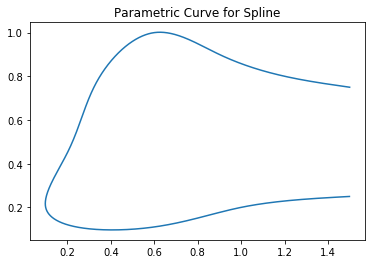


Above is the resulting Parametric Curve when we parameterize the x values and y values by 
using the two cublic spline interpolation with the given t values.


In [216]:
import pandas as pd
Header_x = ['t_j', 'x_j']
Header_y = ['t_j', 'y_j']
Header_s = ['d', 'b', 'c', 'a', 'x_j']

xtable = [
    [0, 1.5],
    [0.618, 0.9],
    [0.935, 0.6],
    [1.255, 0.35],
    [1.636, 0.2],
    [1.905, 0.1],
    [2.317, 0.5],
    [2.827, 1.0], 
    [3.330, 1.5]
]

ytable = [
    [0, 0.75],
    [0.618, 0.9], 
    [0.935, 1.00],
    [1.255, 0.8],
    [1.636, 0.45],
    [1.905, 0.2], 
    [2.317, 0.1],
    [2.827, 0.2], 
    [3.330, 0.25]
]
print("The following is a set of points composed of t_j and x_j, t_j and y_j for j = 0,...,8 respectively.\n")
print (pd.DataFrame(xtable, columns = Header_x), "\n")
print(pd.DataFrame(ytable, columns = Header_y), "\n")
print("Note: column 0 is j.")

#Tabulate coefficient of spline
x_spline = cubic_spline(xtable, len(xtable))
print("\nThe following is a table of coefficients for the natural cublic spline of x values with the first column being j.\n")
print(pd.DataFrame(x_spline, columns = Header_s))

y_spline = cubic_spline(ytable, len(ytable))
print("\nThe following is a table of coefficients for the natural cublic spline of y values with the first column being j.\n")
print(pd.DataFrame(y_spline, columns = Header_s))

import matplotlib.pyplot as plt
import math
import numpy as np

#plot the resulting parametric curve
#We will store the points of our curve in x_lst, y_lst and plot x_lst, y_lst
%matplotlib inline 
ts = [0, 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.828, 3.330] #ts = time
x_lst = []
y_lst= []

for i in range(0, len(ts) -1):
    begin = int(ts[i]*1000)
    end = int(ts[i+1]*1000)
    for j in range(begin, end):
        x = j/1000
        x_val = (x_spline[i][3]*((x-x_spline[i][4])**3)) + (x_spline[i][2]*((x-x_spline[i][4])**2)) + (x_spline[i][1]*((x-x_spline[i][4]))) + x_spline[i][0]
        y_val = (y_spline[i][3]*((x-y_spline[i][4])**3)) + (y_spline[i][2]*((x-y_spline[i][4])**2)) + (y_spline[i][1]*((x-y_spline[i][4]))) + y_spline[i][0]
        x_lst.append(x_val)
        y_lst.append(y_val)
        
plt.title("Parametric Curve for Spline")
plt.plot(x_lst, y_lst)        
plt.show()       

print("\nAbove is the resulting Parametric Curve when we parameterize the x values and y values by \nusing the two cublic spline interpolation with the given t values.")